Load the libraries

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd



In [4]:
# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Acquire - load historical data 

In [5]:
df = pd.DataFrame.from_csv(r'C:\Users\Abhishek Mishra\Desktop\ipython\data\employee-attrition.csv', index_col=None)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


Check for missing data

In [9]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
work_accident            False
promotion_last_5years    False
department               False
salary                   False
left                     False
dtype: bool

Cast categorical data type to numerical

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Now check the distribution of Categorical features

In [12]:
df.describe(include=['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


Sales has 10 ranges and salary has 3 ranges. This will be helpful when we convert the data to numerical features

In [13]:
df['salary'] = df['salary'].map( {'high':2 ,'medium': 1, 'low': 0} ).astype(int)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,0,1
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1
3,0.72,0.87,5,223,5,0,0,sales,0,1
4,0.37,0.52,2,159,3,0,0,sales,0,1


In [25]:
old = [] 
for obj in df['department']:
    if obj not in old:
        
        print(obj)
        old.append(obj)

sales
accounting
hr
technical
support
management
IT
product_mng
marketing
RandD


From this for loop, we know there are ten types of sales: sales, accounting, hr, technical, support, IT, management , product_mng, marketing, RandD. We can now map all of job titles to numbers.

In [28]:
df['department'] = df['department'].map( {'sales':9 , 'accounting':8 , 'hr':7, 'technical':6,  'support':5,  'management':4, 'IT':3,  'product_mng':2,  'marketing':1,  'RandD':0} ).astype(float)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,9.0,0,1
1,0.80,0.86,5,262,6,0,0,9.0,1,1
2,0.11,0.88,7,272,4,0,0,9.0,1,1
3,0.72,0.87,5,223,5,0,0,9.0,0,1
4,0.37,0.52,2,159,3,0,0,9.0,0,1


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.015413,0.050022,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,-0.011855,-0.013002,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,-0.005577,-0.001803,0.023787
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.002387,-0.002242,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.001611,0.048715,0.144822
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.019215,0.009247,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.015170,0.098119,-0.061788
department,-0.015413,-0.011855,-0.005577,0.002387,0.001611,-0.019215,-0.015170,1.000000,-0.033415,0.043814
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,-0.033415,1.000000,-0.157898
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,0.043814,-0.157898,1.000000


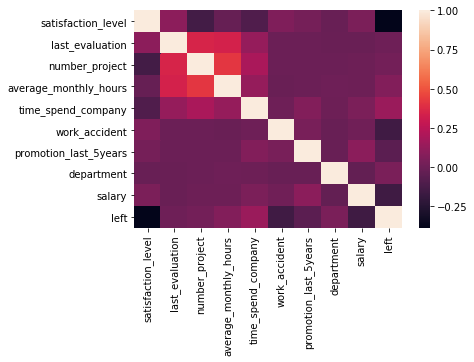

In [29]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

Explore - shape of data


In [34]:
df.sort_values(by='left', ascending = True).head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
7499,0.93,0.58,5,238,2,0,0,9.0,1,0
8138,0.64,0.53,4,133,3,0,0,5.0,0,0
8139,0.61,0.57,4,160,3,1,0,5.0,0,0
8140,0.89,0.85,4,201,2,1,0,5.0,0,0
8141,0.61,0.70,5,157,4,0,0,5.0,0,0


In [56]:
df[(df['department']==9) & (df['left']==0)].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
2000,0.58,0.74,4,215,3,0,0,9.0,0,0
2001,0.82,0.67,2,202,3,0,0,9.0,0,0
2002,0.45,0.69,5,193,3,0,0,9.0,0,0
2003,0.78,0.82,5,247,3,0,0,9.0,0,0
2004,0.49,0.60,3,214,2,0,0,9.0,0,0


In [57]:
df[['left', 'satisfaction_level']].groupby(['left'], as_index=False).mean().sort_values(by='satisfaction_level', ascending=False)

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


Here those who had work accident actually have 0.1 higher possibility to stay in the company, which is counter intuitive. This is the time when Machine Learning comes into play, to discover underlying relationship that does not make sense with normal ways of anaylysis.

In [60]:
df[['left', 'work_accident']].groupby(['left'], as_index=False).mean().sort_values(by='work_accident', ascending=False)

,left,work_accident
0,0,0.175009
1,1,0.047326


When grouped by "left" factor, the data of time_spend_company is not very helpful. Therefore we try to group by time_spend_company as below. We see those who spent 3-6 years at the company are most likely to leave.

In [61]:
df[['left', 'time_spend_company']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='left', ascending=False)

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


The salary factor shows these who left are those who earns the least.

In [62]:
df[['left', 'salary']].groupby(['salary'], as_index=False).mean().sort_values(by='left', ascending=False)

,salary,left
0,0,0.296884
1,1,0.204313
2,2,0.066289


Create new column from existing data.

We see from the previous correlation matrix analysis that 'number_project' and 'average_montly_hours' are strongly correlated, therefore we can combine these existing columns to create new feature.

In [64]:
df["proj*hour"] = df.number_project * df.average_monthly_hours
df.loc[:, ['proj*hour','number_project','average_monthly_hours']].head(10)

,proj*hour,number_project,average_monthly_hours
0,314,2,157
1,1310,5,262
2,1904,7,272
3,1115,5,223
4,318,2,159
5,306,2,153
6,1482,6,247
7,1295,5,259
8,1120,5,224
9,284,2,142


Remove duplicate datasets

In [66]:
df = df.drop(['number_project','average_monthly_hours'], axis=1)

Split train and test datsets

In [69]:
nHead = int(len(df)*0.70)
nTail = int(len(df)*0.30)
X_train = df.drop("left", axis=1).head(nHead)
X_test  = df.drop("left", axis=1).tail(nTail)
Y_train = df["left"].head(nHead)
Y_test = df["left"].tail(nTail)
X_train.shape, X_test.shape

((10499, 8), (4499, 8))

Modeling with dataset

Visualizing the tree
http://www.webgraphviz.com/


Decision Tree - 2 models (with max_depth=3 and max_depth=None)

In [71]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=None)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
predictions = decision_tree.predict(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2928
           1       0.93      1.00      0.97      1571

   micro avg       0.97      0.97      0.97      4499
   macro avg       0.97      0.98      0.97      4499
weighted avg       0.98      0.97      0.98      4499



In [77]:
cm=confusion_matrix(Y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2815  113]
 [   0 1571]]
Accuracy of prediction: 0.975


Decision tree model2

In [78]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
predictions1 = decision_tree.predict(X_test)

Finding a confusion matrix, classification_report,accuracy_score

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(Y_test,predictions1))  
print(classification_report(Y_test,predictions1))  
print(accuracy_score(Y_test, predictions1))
 

[[2707  221]
 [ 123 1448]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2928
           1       0.87      0.92      0.89      1571

   micro avg       0.92      0.92      0.92      4499
   macro avg       0.91      0.92      0.92      4499
weighted avg       0.93      0.92      0.92      4499

0.9235385641253612


Random Forest - 2 models (with n_estimators=10 and with oob)

In [85]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
rfc2 = RandomForestClassifier(n_estimators=100,oob_score=True)
rfc2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

Predictions and Evaluation

In [87]:
rfc_pred = rfc.predict(X_test)

In [105]:
rfc2_pred= rfc.predict(X_test)

In [91]:
cr = classification_report(Y_test,rfc_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2928
           1       0.98      0.99      0.98      1571

   micro avg       0.99      0.99      0.99      4499
   macro avg       0.99      0.99      0.99      4499
weighted avg       0.99      0.99      0.99      4499



In [100]:
# confusion matrix
cm = confusion_matrix(Y_test,rfc_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2899   29]
 [  22 1549]]
Accuracy of prediction: 0.989


In [103]:
cr1 = classification_report(Y_test,rfc2_pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2928
           1       0.98      0.99      0.98      1571

   micro avg       0.99      0.99      0.99      4499
   macro avg       0.99      0.99      0.99      4499
weighted avg       0.99      0.99      0.99      4499



In [104]:
# confusion matrix
cn = confusion_matrix(Y_test,rfc2_pred)
print(cn)
print ("Accuracy of prediction:",round((cn[0,0]+cn[1,1])/cn.sum(),3))

[[2899   29]
 [  22 1549]]
Accuracy of prediction: 0.989


Model Selection - AUC and cross-validation